Kernel Dataset End Parameter Units Degree Clustering
gng Square 20000 0 100 4.32 0.3306666666666665
gng Blobs 20000 0 100 4.3 0.3718571428571426
gng Circles 20000 0 100 2.66 0.32833333333333337
gng Moons 20000 0 100 3.08 0.3913333333333332
rbf Square 20000 1.8 100 4.08 0.29633333333333317
rbf Blobs 20000 1.8 100 3.72 0.2849999999999999
rbf Circles 20000 1.8 100 2.5 0.2166666666666667
rbf Moons 20000 1.8 100 2.86 0.23433333333333334
lap Square 20000 1.8 100 7.0 0.48546031746031754
lap Blobs 20000 1.8 100 12.68 0.558302876518047
lap Circles 20000 1.8 100 4.78 0.570484126984127
lap Moons 20000 1.8 100 6.88 0.6380909090909088
cau Square 20000 1.8 100 3.96 0.25385714285714295
cau Blobs 20000 1.8 100 3.88 0.2957142857142856
cau Circles 20000 1.8 100 2.6 0.2966666666666666
cau Moons 20000 1.8 100 2.96 0.30133333333333323
imq Square 20000 1.8 100 3.9 0.2736666666666666
imq Blobs 20000 1.8 100 3.66 0.3033333333333333
imq Circles 20000 1.8 100 2.3 0.1566666666666667
imq Moons 20000 1.8 100 2.74 

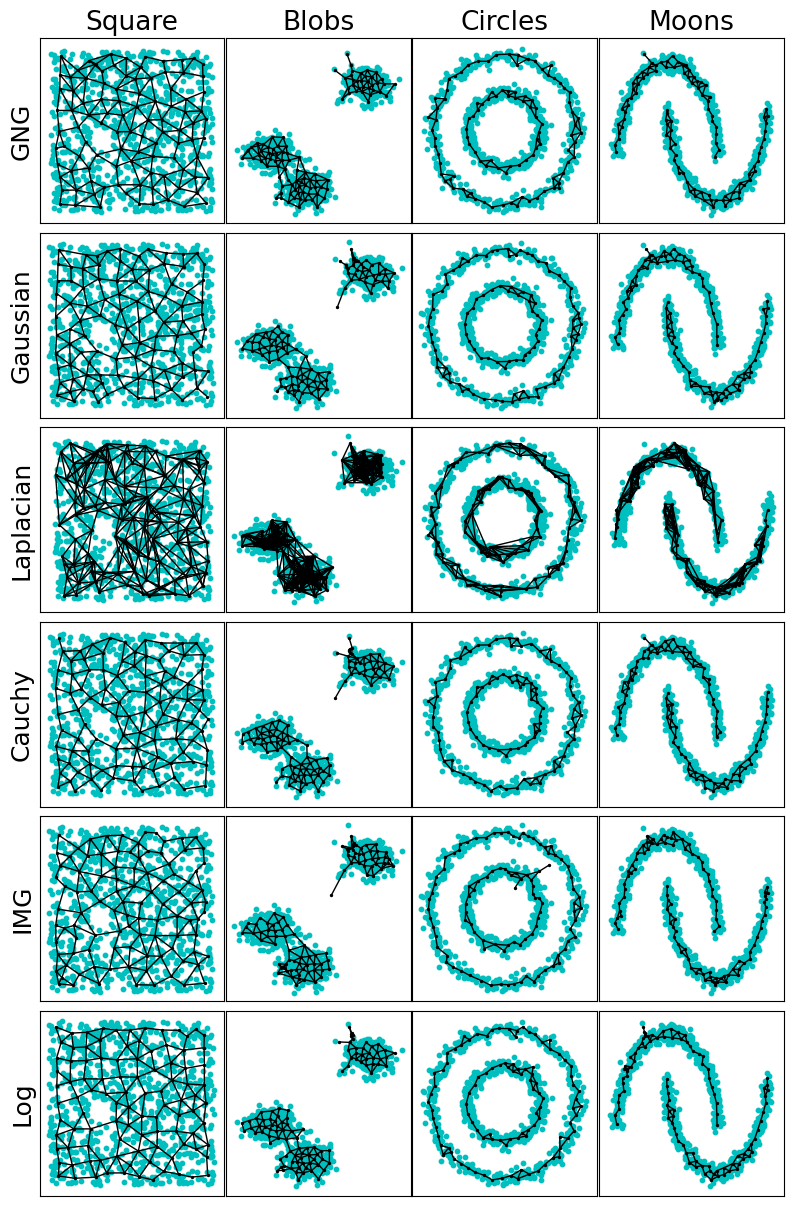

In [1]:
#---------------------------------------
#Since : 2017/08/31
#Update: 2023/04/30
# -*- coding: utf-8 -*-
#---------------------------------------
import gng
import dataset as dataset

import struct
from array import array
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys
from sklearn import metrics
import networkx as nx

from kgng import kernel_GNG

titles   = ["Square", "Blobs", "Circles", "Moons"]
kernels  = ["gng", "rbf", "lap", "cau", "imq", "log"]
names    = ["GNG", "Gaussian", "Laplacian", "Cauchy", "IMG", "Log"]
params   = {"rbf": 1.8, "lap": 1.8, "cau":1.8, "imq":1.8, "log":3.0,"gng":0}
end      = 20000 # The end of iterations

plt.figure(figsize=(4*2, 8*1.5))
plt.subplots_adjust(
    left=0.05, right=0.98, bottom=0.005, top=0.97, wspace=0.01, hspace=0.05
)

datasets = dataset.Datasets()

print("Kernel", "Dataset", "End", "Parameter", "Units", "Degree", "Clustering")

plot_num = 1
for f in range(len(kernels)):
    for i in titles:
        np.random.seed(1)
        plt.subplot(len(kernels), len(titles), plot_num)

        k, data, true_labels = datasets.dataset(i)

        som = kernel_GNG(num = 100, lam = 100, ew = 0.2, en = 0.006, amax = 50.0, alpha = 0.5, beta = 0.995, end = end, kernel_func = kernels[f] , param = params[kernels[f]])
        data = som.normalize(data)
        som.train(data)

        nodes = nx.number_of_nodes(som.g_units)
        edges = 2 * nx.number_of_edges(som.g_units) / float(nx.number_of_nodes(som.g_units))
        clustering = nx.average_clustering(som.g_units)

        plt.scatter(data[:,0], data[:,1], s=10, c="c")
        nx.draw_networkx_nodes(som.g_units, som.units, node_size=2, node_color=[(0,0,0)])
        nx.draw_networkx_edges(som.g_units, som.units, width=1, edge_color='k')

        if i == titles[0]:
            plt.ylabel(names[f] , fontsize=18)
        if kernels[f] == kernels[0]:
            plt.title(i, fontsize=19)

        print(kernels[f], i, end, params[kernels[f]], nodes, edges, clustering)
        plot_num += 1

#plt.show()
plt.savefig("scatters.png", dpi=300)
